In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
%matplotlib inline


In [4]:
data = pd.read_csv("avengers.csv",encoding = "latin-1")
data.drop("URL",axis=1,inplace=True)

In [5]:
data.head()

,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


# Checking null values 

In [6]:
def about_data(df):
    df.info()
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [7]:
about_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name/Alias                   163 non-null    object
 1   Appearances                  173 non-null    int64 
 2   Current?                     173 non-null    object
 3   Gender                       173 non-null    object
 4   Probationary Introl          15 non-null     object
 5   Full/Reserve Avengers Intro  159 non-null    object
 6   Year                         173 non-null    int64 
 7   Years since joining          173 non-null    int64 
 8   Honorary                     173 non-null    object
 9   Death1                       173 non-null    object
 10  Return1                      69 non-null     object
 11  Death2                       17 non-null     object
 12  Return2                      16 non-null     object
 13  Death3                       2 non-

,columns,total missing,ration of missing
0,Name/Alias,10,0.057803
1,Appearances,0,0.000000
2,Current?,0,0.000000
3,Gender,0,0.000000
4,Probationary Introl,158,0.913295
5,Full/Reserve Avengers Intro,14,0.080925
6,Year,0,0.000000
7,Years since joining,0,0.000000
8,Honorary,0,0.000000
9,Death1,0,0.000000


In [8]:
data.drop('Probationary Introl',axis=1,inplace=True)


# Null Values

In [9]:
data['Death1'].fillna('Never Happen', inplace = True)
data['Death2'].fillna('Never Happen', inplace = True) 
data['Death3'].fillna('Never Happen', inplace = True) 
data['Death4'].fillna('Never Happen', inplace = True) 
data['Death5'].fillna('Never Happen', inplace = True) 
data['Return1'].fillna('Never Happen', inplace = True)
data['Return2'].fillna('Never Happen', inplace = True) 
data['Return3'].fillna('Never Happen', inplace = True) 
data['Return4'].fillna('Never Happen', inplace = True) 
data['Return5'].fillna('Never Happen', inplace = True) 
data["Full/Reserve Avengers Intro"].fillna('Unknown', inplace = True) 

In [10]:
data.Notes = data.Notes.str.replace("_"," ")


In [11]:
data.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Fear Itself brought back because that'...


<AxesSubplot:xlabel='Gender', ylabel='count'>

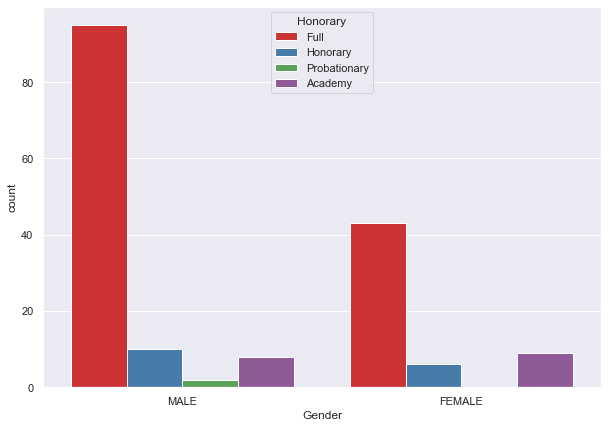

In [12]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Gender",hue="Honorary",palette='Set1')

<AxesSubplot:xlabel='Current?', ylabel='count'>

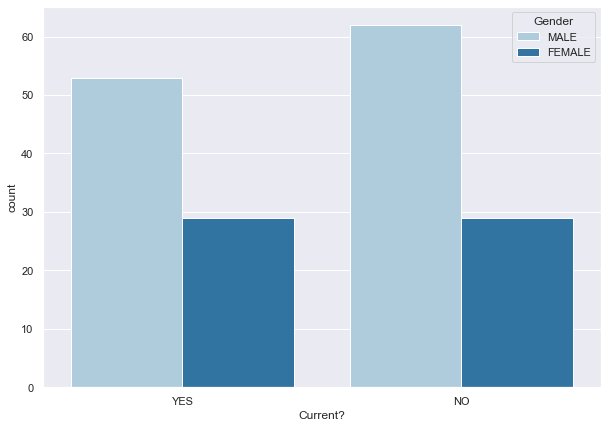

In [13]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Current?",hue="Gender",palette='Paired')

In [15]:
def disturbition(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

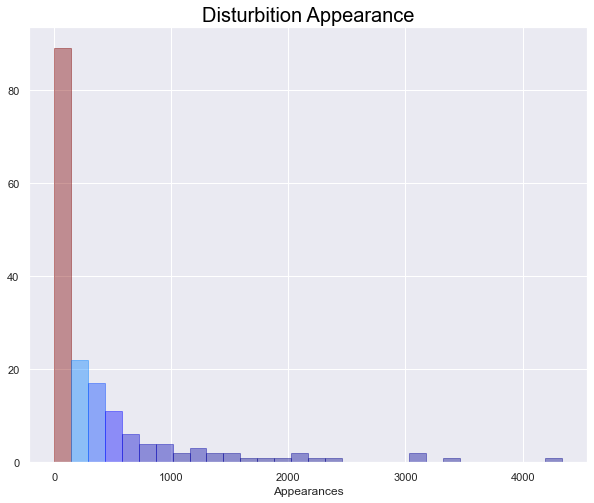

In [16]:
disturbition(data.Appearances,"Disturbition Appearance")

<AxesSubplot:xlabel='Current?', ylabel='Years since joining'>

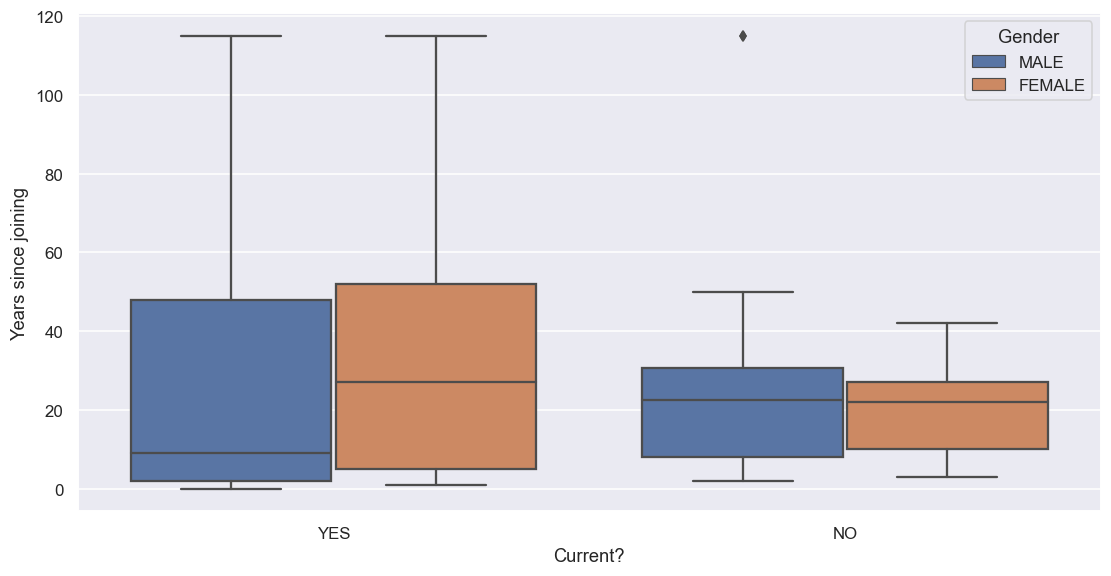

In [17]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Years since joining',x='Current?',hue="Gender",data=data)

<AxesSubplot:xlabel='Current?', ylabel='Appearances'>

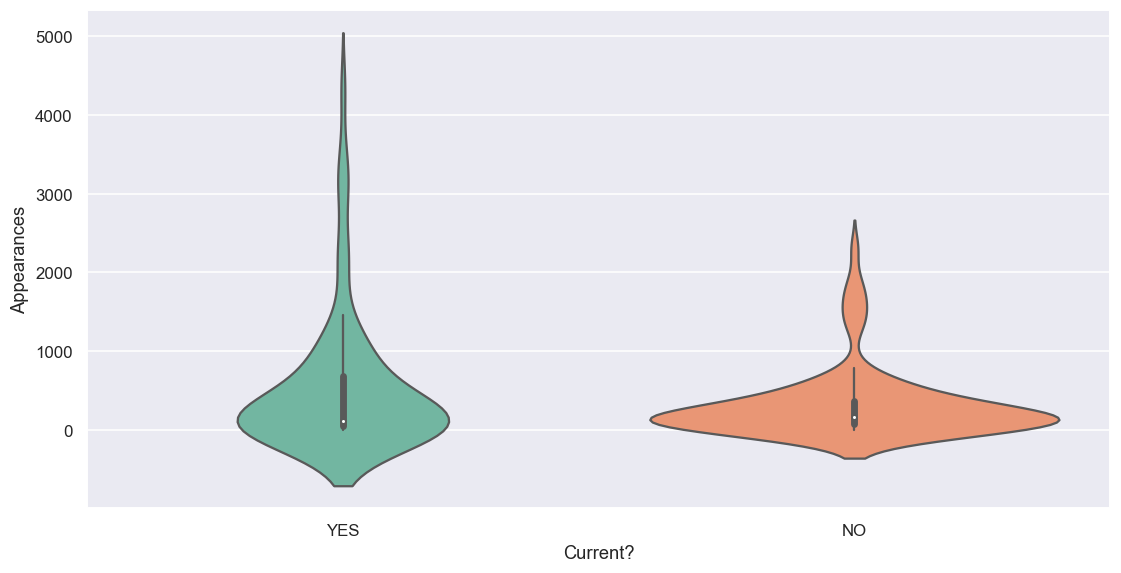

In [18]:
plt.figure(figsize=(12,6),dpi=110)
sns.violinplot(y='Appearances',x='Current?',data=data,palette='Set2')

<Figure size 1320x660 with 0 Axes>

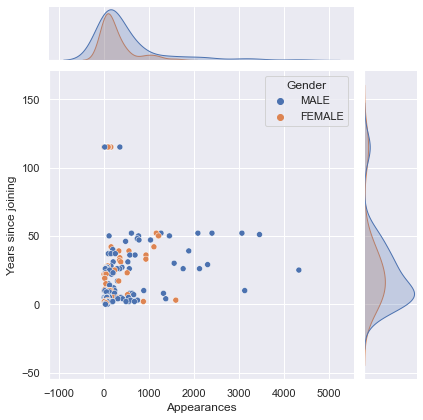

In [19]:
plt.figure(figsize=(12,6),dpi=110)
sns.jointplot(x='Appearances',y='Years since joining',data=data,hue="Gender")

<Figure size 1320x660 with 0 Axes>

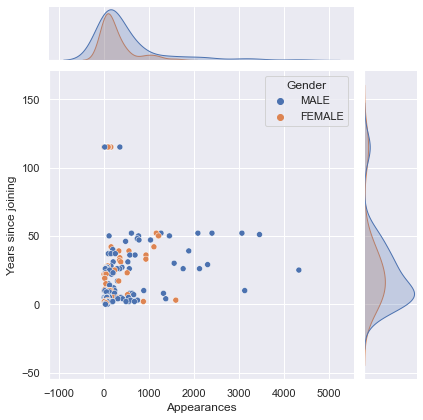

In [20]:
plt.figure(figsize=(12,6),dpi=110)
sns.jointplot(x='Appearances',y='Years since joining',data=data,hue="Gender")

Text(0.5, 1.0, 'Honored Actors & Actresses')

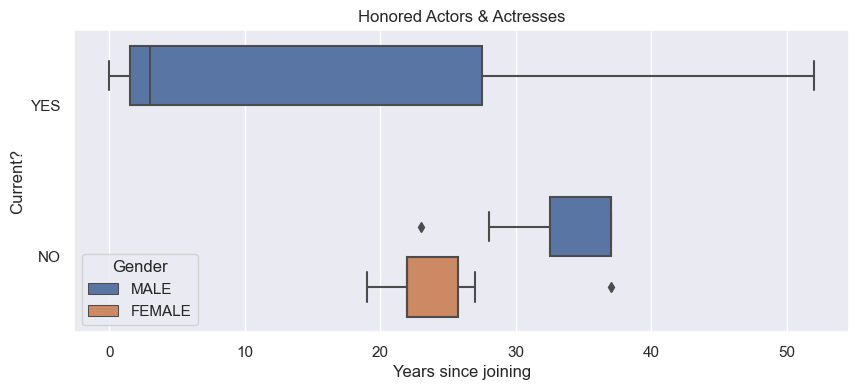

In [21]:
is_honory = data[data['Honorary']=='Honorary']
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x='Years since joining',y='Current?',data=is_honory,orient='h',hue="Gender")
plt.title("Honored Actors & Actresses")

In [26]:
still_alive = data[data['Notes'].isnull()]
death = data[data['Notes'].notnull()]

# Death

In [27]:
death.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Fear Itself brought back because that'...


<AxesSubplot:xlabel='Gender', ylabel='count'>

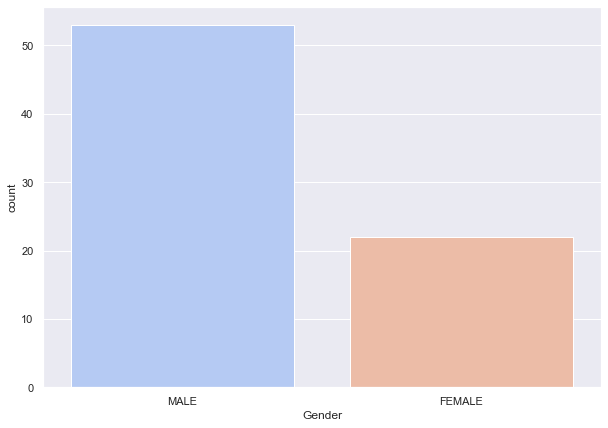

In [29]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = death, x="Gender",palette='coolwarm')

<AxesSubplot:xlabel='Gender', ylabel='Appearances'>

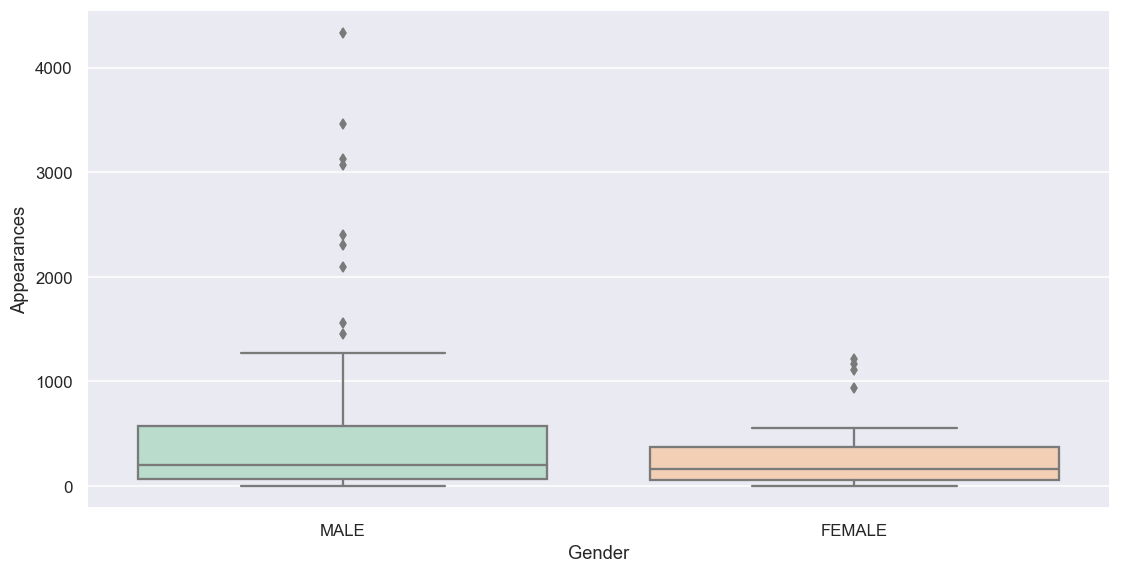

In [30]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=death,palette='Pastel2')

# Still Alive

In [31]:
still_alive

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
5,Richard Milhouse Jones,612,YES,MALE,Sep-63,1963,52,Honorary,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
11,Heracles,741,YES,MALE,Oct-67,1967,48,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
12,T'Challa,780,NO,MALE,May-68,1968,47,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
14,Dane Whitman,482,NO,MALE,Dec-69,1969,46,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
17,Henry P. McCoy,1886,NO,MALE,Sep-76,1976,39,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Eric Brooks,198,YES,MALE,13-Nov,2013,2,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
169,Adam Brashear,29,YES,MALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
170,Victor Alvarez,45,YES,MALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
171,Ava Ayala,49,YES,FEMALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN


<AxesSubplot:xlabel='Gender', ylabel='count'>

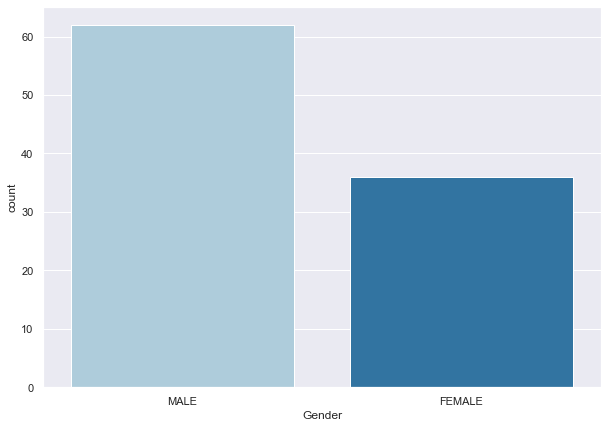

In [32]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = still_alive, x="Gender",palette='Paired')

<AxesSubplot:xlabel='Gender', ylabel='Appearances'>

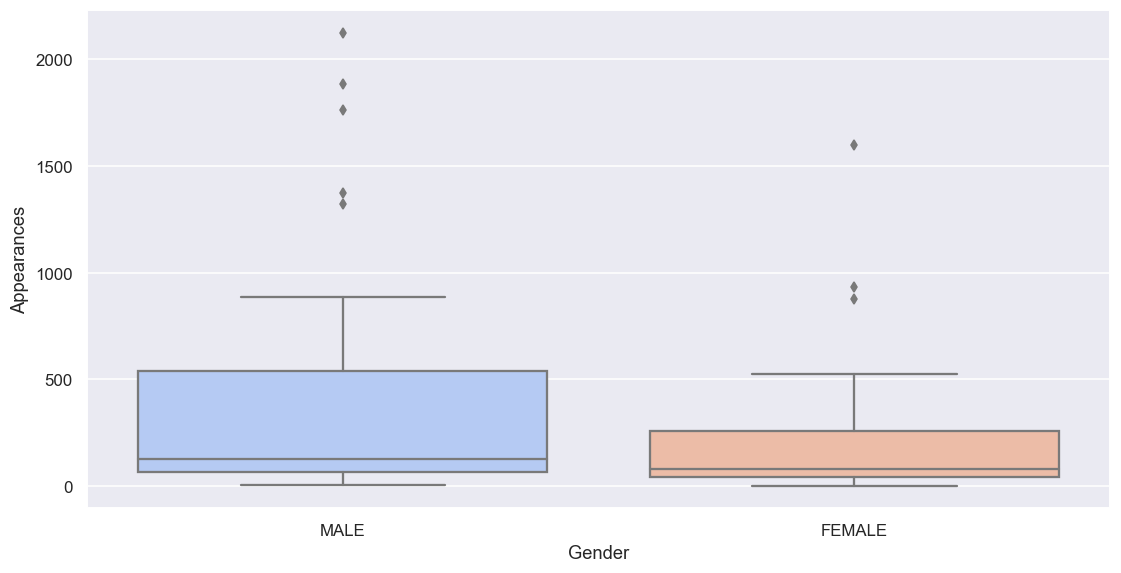

In [33]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=still_alive,palette='coolwarm')